In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [5]:
milk = pd.read_csv("D:\\pa\\milk.csv")
milk.head()

,Animal,water,protein,fat,lactose,ash
0,HORSE,90.1,2.6,1.0,6.9,0.35
1,ORANGUTAN,88.5,1.4,3.5,6.0,0.24
2,MONKEY,88.4,2.2,2.7,6.4,0.18
3,DONKEY,90.3,1.7,1.4,6.2,0.40
4,HIPPO,90.4,0.6,4.5,4.4,0.10


In [6]:
milk.describe()

,water,protein,fat,lactose,ash
count,25.000000,25.000000,25.000000,25.00000,25.000000
mean,78.184000,6.212000,10.308000,4.13200,0.863200
std,12.817913,3.652547,10.517997,1.83183,0.504824
min,44.900000,0.600000,1.000000,0.00000,0.100000
25%,71.300000,3.000000,3.400000,2.70000,0.530000
50%,82.000000,5.900000,6.300000,4.70000,0.800000
75%,87.700000,9.700000,13.100000,5.60000,1.100000
max,90.400000,12.300000,42.000000,6.90000,2.300000


In [7]:
milk.isnull().sum()

Animal     0
water      0
protein    0
fat        0
lactose    0
ash        0
dtype: int64

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
milk[['water','protein','fat','lactose','ash']]=scaler.fit_transform(milk[['water','protein','fat','lactose','ash']])
milk.head()

,Animal,water,protein,fat,lactose,ash
0,HORSE,0.993407,0.170940,0.000000,1.000000,0.113636
1,ORANGUTAN,0.958242,0.068376,0.060976,0.869565,0.063636
2,MONKEY,0.956044,0.136752,0.041463,0.927536,0.036364
3,DONKEY,0.997802,0.094017,0.009756,0.898551,0.136364
4,HIPPO,1.000000,0.000000,0.085366,0.637681,0.000000


In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
milk1 = milk[['water','protein','fat','lactose','ash']]
kmeans.fit(milk1)
print(kmeans.cluster_centers_)
y_km = kmeans.fit_predict(milk1)

[[0.76868132 0.54273504 0.17652439 0.61050725 0.36079545]
 [0.01648352 0.81623932 0.91341463 0.06521739 0.26818182]
 [0.50461538 0.86666667 0.3995122  0.34492754 0.7       ]
 [0.95824176 0.16837607 0.04390244 0.82318841 0.175     ]]


In [12]:
milk1

,water,protein,fat,lactose,ash
0,0.993407,0.170940,0.000000,1.000000,0.113636
1,0.958242,0.068376,0.060976,0.869565,0.063636
2,0.956044,0.136752,0.041463,0.927536,0.036364
3,0.997802,0.094017,0.009756,0.898551,0.136364
4,1.000000,0.000000,0.085366,0.637681,0.000000
5,0.940659,0.247863,0.058537,0.695652,0.277273
6,0.923077,0.358974,0.017073,0.826087,0.363636
7,0.817582,0.452991,0.168293,0.681159,0.309091
8,0.813187,0.581197,0.151220,0.391304,0.340909
9,0.806593,0.811966,0.129268,0.637681,0.295455


In [13]:
y_km

array([0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 1,
       1, 3, 3])

In [14]:
milk1['y_km']=pd.Series(y_km)
milk1

,water,protein,fat,lactose,ash,y_km
0,0.993407,0.170940,0.000000,1.000000,0.113636,0
1,0.958242,0.068376,0.060976,0.869565,0.063636,0
2,0.956044,0.136752,0.041463,0.927536,0.036364,0
3,0.997802,0.094017,0.009756,0.898551,0.136364,0
4,1.000000,0.000000,0.085366,0.637681,0.000000,0
5,0.940659,0.247863,0.058537,0.695652,0.277273,0
6,0.923077,0.358974,0.017073,0.826087,0.363636,0
7,0.817582,0.452991,0.168293,0.681159,0.309091,2
8,0.813187,0.581197,0.151220,0.391304,0.340909,2
9,0.806593,0.811966,0.129268,0.637681,0.295455,2


In [16]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
milk1 = milk[['water','protein','fat','lactose','ash']]

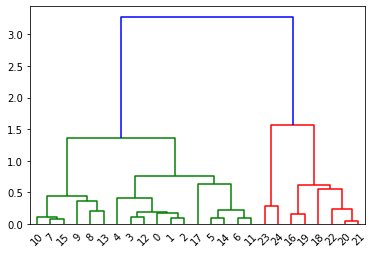

In [17]:
dendrogram = sch.dendrogram(sch.linkage(milk1, method= 'ward'))
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean',linkage='ward')
y_hc = hc.fit_predict(milk1)


In [20]:
milk['y_hc']=pd.Series(y_hc)
milk

,Animal,water,protein,fat,lactose,ash,y_hc
0,HORSE,0.993407,0.170940,0.000000,1.000000,0.113636,0
1,ORANGUTAN,0.958242,0.068376,0.060976,0.869565,0.063636,0
2,MONKEY,0.956044,0.136752,0.041463,0.927536,0.036364,0
3,DONKEY,0.997802,0.094017,0.009756,0.898551,0.136364,0
4,HIPPO,1.000000,0.000000,0.085366,0.637681,0.000000,0
5,CAMEL,0.940659,0.247863,0.058537,0.695652,0.277273,0
6,BISON,0.923077,0.358974,0.017073,0.826087,0.363636,0
7,BUFFALO,0.817582,0.452991,0.168293,0.681159,0.309091,3
8,GUINEA PIG,0.813187,0.581197,0.151220,0.391304,0.340909,3
9,CAT,0.806593,0.811966,0.129268,0.637681,0.295455,3
